<a href="https://colab.research.google.com/github/SantiagoMorenoV/Position-vs-Salaries/blob/main/Python/Pos_Salaries_Dec_Tree_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Did the interviewee tell the truth?**

An HR recruiter wants to know if a candidate told the truth or not about his salary in his previous position. 

For this case, I have a dataset with the positions and salaries from the company where the candidate used to work.

This time I will estimate a Decision Tree Regression.

# **Importing the libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Importing the dataset**

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/SantiagoMorenoV/Position-vs-Salaries/main/Position_Salaries.csv?token=GHSAT0AAAAAACAGCYI67EQ4C5YEIZO6TGKMZBKIN4A')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# **Plotting Data**

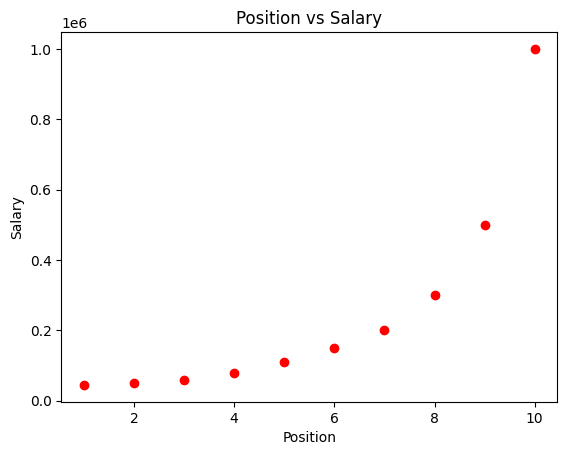

In [ ]:
plt.scatter(X, y, color='red')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Position vs Salary')
plt.show()

## **Descriptive Statistics**

In [ ]:
print("\n\033[1m\033[36m\033[6m{:^50}\033[0m".format("Descriptive Statistics"))
print(dataset.describe().round(2))


              Descriptive Statistics              
       Level      Salary
count  10.00       10.00
mean    5.50   249500.00
std     3.03   299373.88
min     1.00    45000.00
25%     3.25    65000.00
50%     5.50   130000.00
75%     7.75   275000.00
max    10.00  1000000.00


# Salary distribution

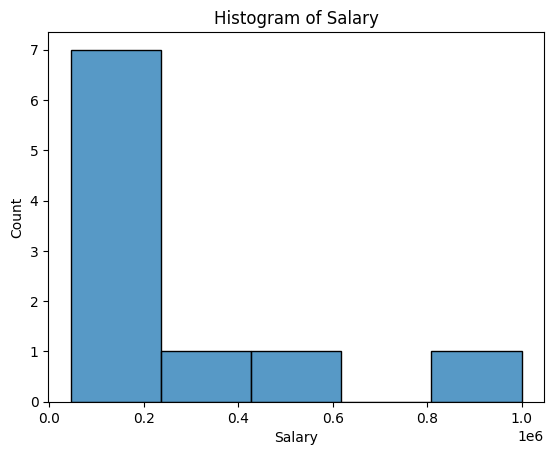

In [ ]:
# Selecting our variables
variables = ["Salary"]

# Creating histograms
for var in variables: 
  sns.histplot(data = dataset, x = var)
  plt.title("Histogram of {}".format(var))
  plt.show()

## **Salary boxplot**

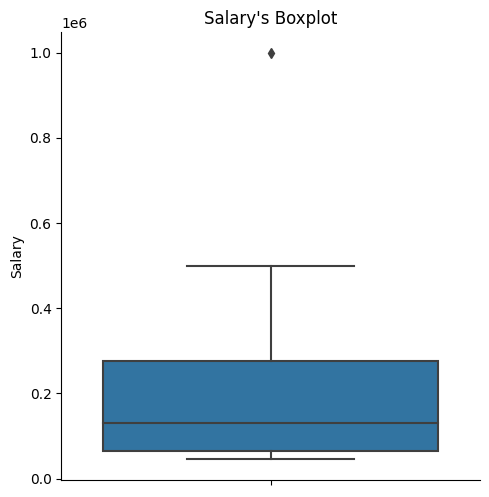

In [ ]:
for var in variables:
    sns.catplot(data = dataset, y = var, kind = "box") 
    plt.title("{}'s Boxplot".format(var)) 
    plt.show()

# **Training the Decision Tree Regression on the whole dataset**

For this exercise, I have trained the model on the whole dataset because there are only ten records.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

If this part is not displayed on Github, please copy the URL and paste it on https://nbviewer.org/. However, this will not affect the rest of the code or its execution.

# **Predicting the salary**

In [ ]:
 regressor.predict([[6.5]])

array([150000.])

# **Visualising the Decesion Tree Regresion results (higher resolution and smoother curve)**

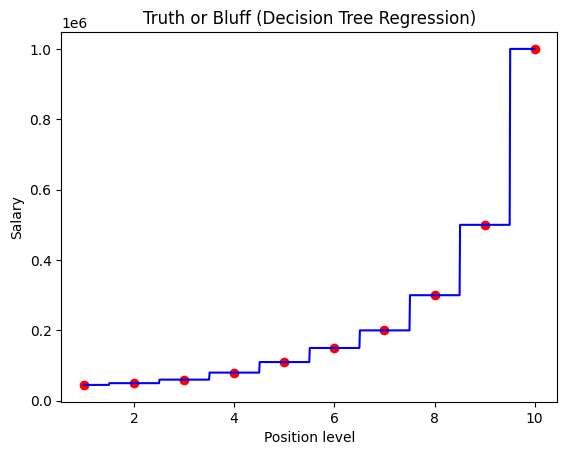

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In this case, the Decisioon Tree Regresion looks like this because I only have one dimension to work with. 

In [ ]:
y_pred = regressor.predict(X)
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
r2

1.0

# **Discussion**

Once evaluated that the previous position of the candidate was Regional Manager, he had been working in that role for two years, and also that, once gotten data from the previous company, it was possible to classify him as an intermediate-level in the 6-7 range or between Regional Manager and Partner. In other words, a 6.5 position level.

The Decision Tree Regression (DTR) predicted this candidate's salary of USD 150K. This time, as I got a 100% R-squared and the DTR has only one dimension, this model might be overfitted. Consequently, it would end up showing incorrect predictions and unreliable results.

Yet, this is an interesting academic exercise, and working with a higher dimensional DTR could result in better performance regarding reducing overfitting.